# Content and Objectives

- Show some non-coherent modulation schemes: DPSK and FSK
- Show exemplary signals and depict their spectrum 

# Import

In [1]:
# importing
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib


In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(18, 8) )


# showing figures inline
%matplotlib inline

In [14]:
# set parameter for all schemes
T_pulse = 1

# samples-per-smbol
n_sps = 128

# time vector per pulse
t_per_pulse = np.linspace( 0, T_pulse, n_sps )
t_sample = T_pulse / n_sps

# parameters of the RRC filter
# design is chosen such that interval length equals 6 sigma
pulse = np.ones( n_sps )
pulse /= np.linalg.norm( pulse )

# NOTE: to illustrate phase deltas, an artificial carrier frequency if applied
f_c = 2

# number of symbols within the signal
n_symb = 1000

# number of symbols shown in the time signal
n_shown = 3

# DPSK

+ Shows signal and spectrum of DPSK

In [15]:
# set parameter for all schemes
T = T_pulse

# total time for all n_symb symbols
t_DPSK_total = np.linspace( 0, ( n_symb + 1 ) * T, n_sps * n_symb )


In [16]:
# sample random bits and construct signal
M = 4

# offset
theta_0 = np.pi/ 4

# (int) symbols to be transmitted
symbols = np.random.randint( M, size=n_symb )

In [17]:
# now modulate and find phases
delta_theta = 2 * np.pi * symbols / M + theta_0

theta = np.cumsum( delta_theta )


In [18]:
# signal in baseband
s = np.zeros( n_sps * n_symb, dtype=complex )
s[ :: n_sps ] = np.exp( 1j * theta )
s = np.convolve( s, pulse )[ : -n_sps+1]

# signal in bandpass
s_DPSK_BP = np.real( s * np.exp( 1j * 2 * np.pi * f_c * t_DPSK_total ) )

<Figure size 1800x800 with 0 Axes>

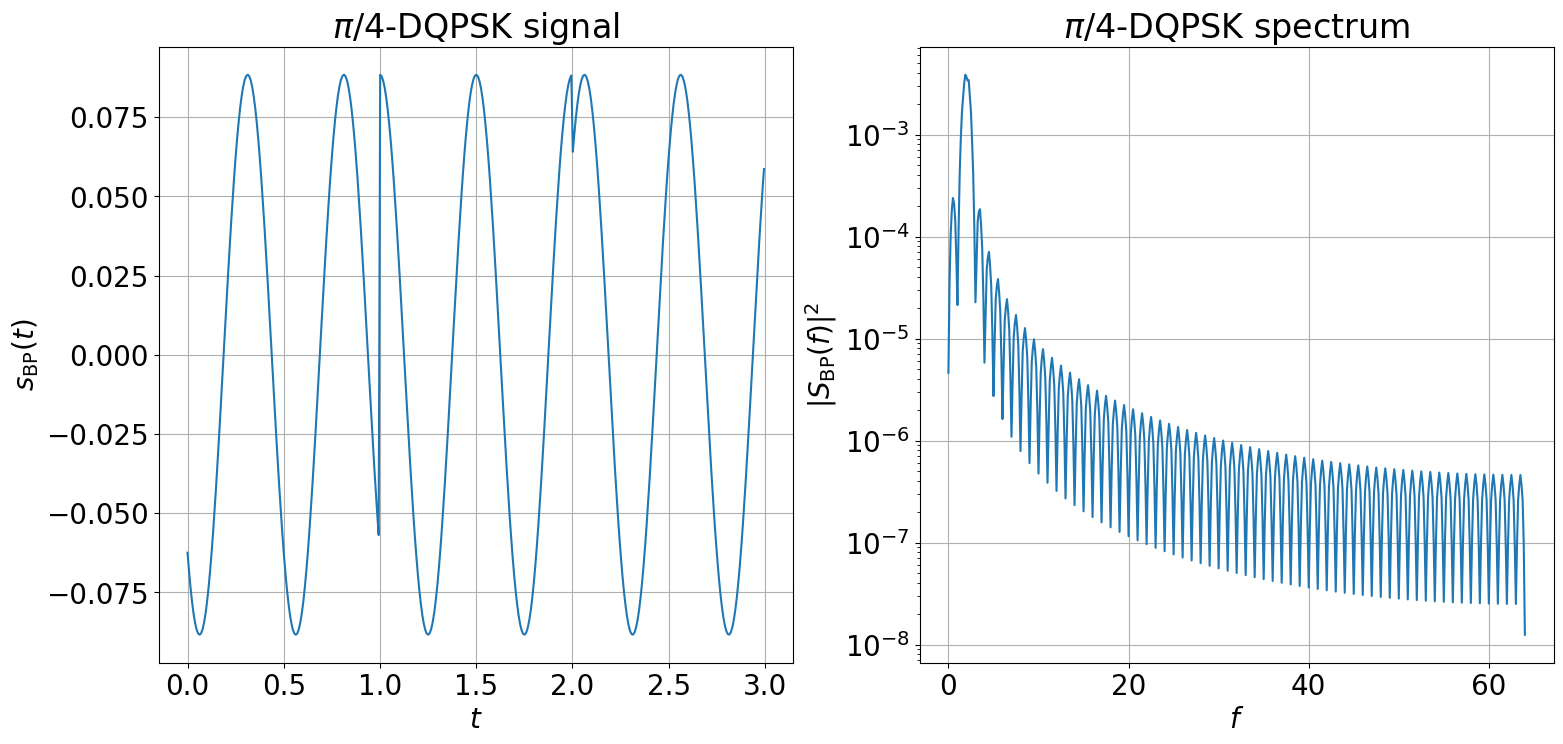

In [19]:
plt.figure()

fig, axs = plt.subplots(1, 2)

ax = plt.subplot(121)
plt.plot( t_DPSK_total[ : n_shown * n_sps ], s_DPSK_BP[ : n_shown * n_sps ]  )

plt.xlabel('$t$'); plt.ylabel('$s_\mathrm{BP}(t)$')
plt.grid(1); plt.title('$\pi/4$-DQPSK signal')

ax = plt.subplot(122)

f_DPSK, S_DPSK = signal.welch( s_DPSK_BP, 1/t_sample, nperseg=1024 ) 
plt.semilogy( f_DPSK, S_DPSK, label='$\pi/4$-DQPSK' )

plt.xlabel('$f$'); plt.ylabel('$|S_\mathrm{BP}(f)|^2$')
plt.grid(1); plt.title('$\pi/4$-DQPSK spectrum')
plt.show()

# FSK 

+ Shows signal and spectrum of 2-FSK (frequency shift keying)
+ Information is represented in the frequency of the pulse, a binary 0 meaning that frequency is shifted by + delta_f, binary 1 resultig in -delta_f

In [9]:
# number of PPM indices, log2 of which corresponds to bits
M_FSK = 2

# delta_f for FSP
delta_f = 2
f_c = 10

# duration of pulse and symbol
T = T_pulse 

# total time for all n_symb symbols
t_FSK_total = np.linspace( 0, ( n_symb + 1 ) * T, n_sps * n_symb )

In [10]:
# bits to be transmitted
b = np.random.randint( M_FSK, size=n_symb )
b_antipodal = 1 - 2 * b

# construct signal
s_FSK_copy_paste  = np.zeros( n_symb * n_sps, dtype=complex )
for _n in range( n_symb ):
    s_FSK_copy_paste[ _n * n_sps : ( _n + 1 ) * n_sps ] = np.exp( 1j * 2 * np.pi * delta_f * b_antipodal[ _n ] * t_per_pulse )

s_FSK_bandpass = np.real( s_FSK_copy_paste * np.exp( 1j * 2 * np.pi * f_c * t_FSK_total ) )

<Figure size 1800x800 with 0 Axes>

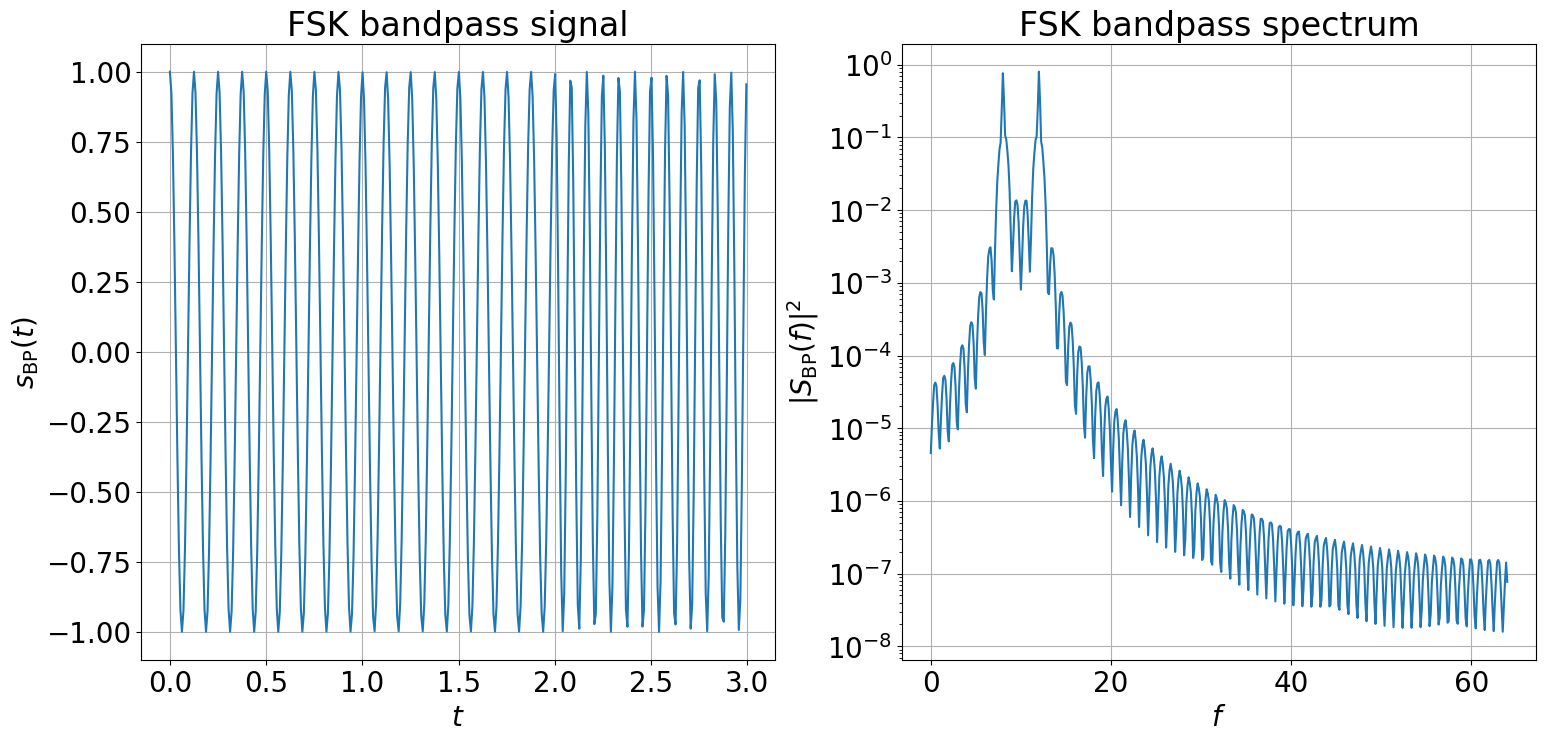

In [22]:
plt.figure()
fig, axs = plt.subplots(1, 2)

ax = plt.subplot(121)
plt.plot( t_FSK_total[ : n_shown * n_sps ], s_FSK_bandpass[ : n_shown * n_sps ] )
plt.xlabel('$t$'); plt.ylabel('$s_\mathrm{BP}(t)$')
plt.grid(1); plt.title('FSK bandpass signal')

ax = plt.subplot(122)

f_FSK, S_FSK = signal.welch( s_FSK_bandpass, 1/t_sample, nperseg=1024 ) 
plt.semilogy( f_FSK, S_FSK )

plt.xlabel('$f$'); plt.ylabel('$|S_\mathrm{BP}(f)|^2$')
plt.grid(1); plt.title('FSK bandpass spectrum')
plt.show()

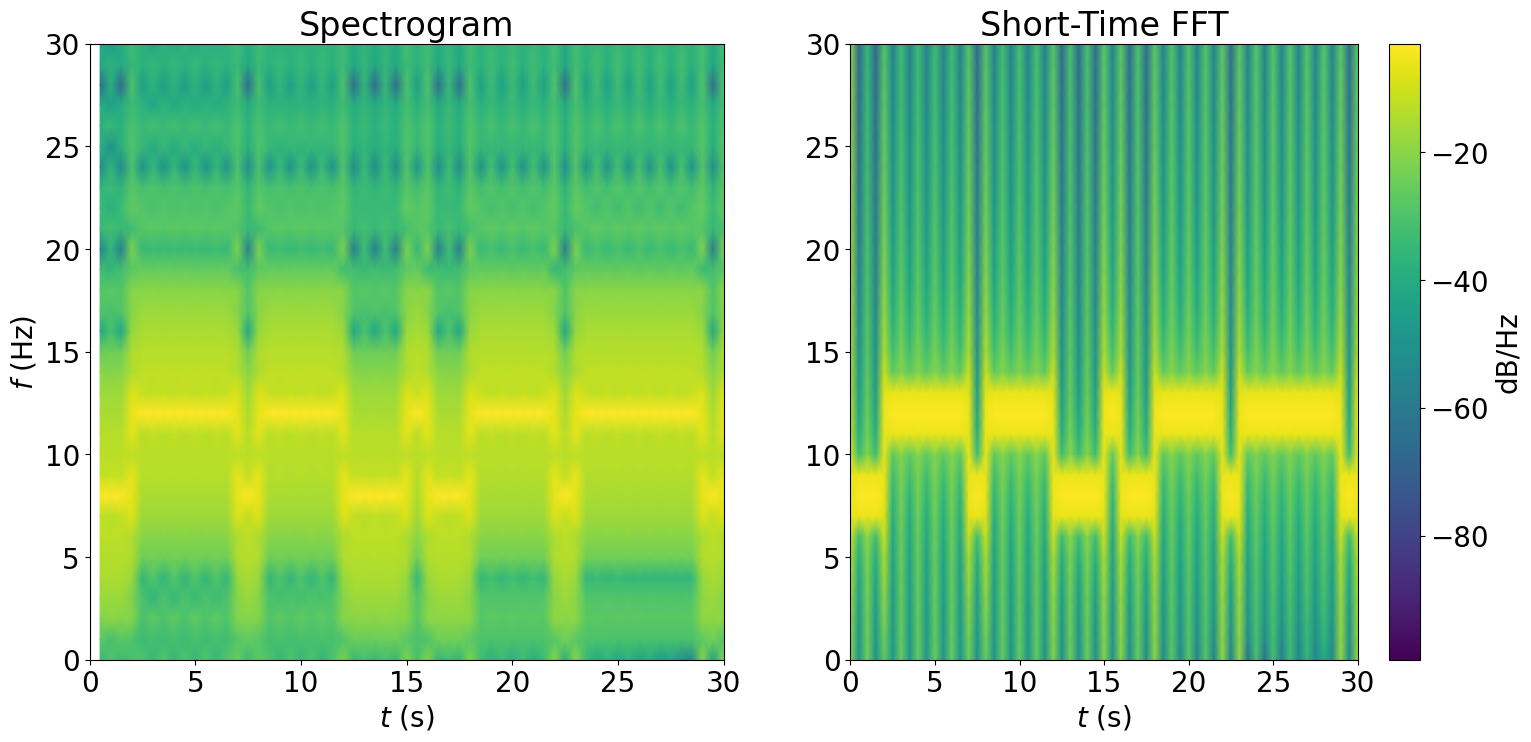

In [21]:

# spectrogram to observe spectrum over time
f_spectro, t_spectro, S_FSK_spectro = signal.spectrogram( s_FSK_bandpass, fs=1/t_sample, nperseg=n_sps, noverlap=n_sps/2)
f_stfft, t_stfft, S_FSK_stfft = signal.stft( s_FSK_bandpass , fs=1/t_sample, nperseg=n_sps, noverlap=n_sps/2)


plt.figure()

plt.subplot(121)
plt.pcolormesh( t_spectro, f_spectro, 10 * np.log10( S_FSK_spectro ), shading='gouraud' )
# plt.colorbar(label="dB/Hz")
plt.xlabel("$t$ (s)")
plt.ylabel("$f$ (Hz)")
plt.title("Spectrogram")
plt.xlim( (0, 30))
plt.ylim( (0, 30))

plt.subplot(122)
plt.pcolormesh( t_stfft, f_stfft, 10 * np.log10( np.abs( S_FSK_stfft ) ), shading='gouraud' )
plt.colorbar(label="dB/Hz")
plt.xlabel("$t$ (s)")
# plt.ylabel("$f$ (Hz)")
plt.title("Short-Time FFT")
plt.xlim( (0, 30))
plt.ylim( (0, 30))

plt.show()
